# MySQL Connection to Python

In [1]:
#!pip install mysql-connector-python

  Obtaining dependency information for mysql-connector-python from https://files.pythonhosted.org/packages/eb/ba/b193640395c8a661445561e1a14ac79800c666e1142be7dbac99e7decd0c/mysql_connector_python-8.2.0-cp310-cp310-win_amd64.whl.metadata
     ---------------------------------------- 0.0/527.0 kB ? eta -:--:--
      --------------------------------------- 10.2/527.0 kB ? eta -:--:--
     ---- ---------------------------------- 61.4/527.0 kB 1.7 MB/s eta 0:00:01
     -------------------------------- ----- 450.6/527.0 kB 5.6 MB/s eta 0:00:01
     -------------------------------------- 527.0/527.0 kB 5.5 MB/s eta 0:00:00
   ---------------------------------------- 0.0/14.2 MB ? eta -:--:--
   - -------------------------------------- 0.5/14.2 MB 10.7 MB/s eta 0:00:02
   --- ------------------------------------ 1.1/14.2 MB 11.3 MB/s eta 0:00:02
   --- ------------------------------------ 1.3/14.2 MB 9.0 MB/s eta 0:00:02
   ----- ---------------------------------- 1.9/14.2 MB 9.9 MB/s eta 0:0

In [36]:
import mysql.connector
from mysql.connector import Error
import pandas as pd
import datetime as dt
import warnings 
warnings.filterwarnings("ignore")
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Connect to the Server

In [7]:
def server_connection(host_name, user_name, user_password):
    connection = None
    try:
        connection = mysql.connector.connect(
        host = host_name,
        user = user_name,
        passwd = user_password)
        print("MySQL database connection successful")
    except Error as err:
        print(f'Error: {err}')
    return connection

In [8]:
server_connection("10.101.1.5","ds160","SP2023")

MySQL database connection successful


### Connect to the database

In [10]:
def database_connection(host_name, user_name, user_password, db_name):
    connection = None
    try:
        connection = mysql.connector.connect(
        host = host_name,
        user = user_name,
        passwd = user_password,
        database = db_name)
        print("Database connection successful")
    except Error as err:
        print(f'Error: {err}')
    return connection

In [16]:
db_connection = database_connection("10.101.1.5","ds160","SP2023",'awesome_chocolates')
print(db_connection)

Database connection successful


### Read the data using Pandas Dataframe

In [21]:
query = "SELECT * from sales"
db = pd.read_sql(query, db_connection)

In [23]:
db.head()

,SPID,GeoID,PID,SaleDate,Amount,Customers,Boxes
0,SP01,G4,P04,2021-01-01,8414,276,495
1,SP02,G3,P14,2021-01-01,532,317,54
2,SP12,G2,P08,2021-01-01,5376,178,269
3,SP01,G4,P15,2021-01-01,259,32,22
4,SP19,G2,P18,2021-01-01,5530,4,179


In [40]:
db['SaleDay']=db['SaleDate'].dt.day_name()
db

,SPID,GeoID,PID,SaleDate,Sale_Day,Amount,Customers,Boxes,SaleDay
0,SP01,G4,P04,2021-01-01,Friday,8414,276,495,Friday
1,SP02,G3,P14,2021-01-01,Friday,532,317,54,Friday
2,SP12,G2,P08,2021-01-01,Friday,5376,178,269,Friday
3,SP01,G4,P15,2021-01-01,Friday,259,32,22,Friday
4,SP19,G2,P18,2021-01-01,Friday,5530,4,179,Friday
...,...,...,...,...,...,...,...,...,...
7612,SP23,G2,P13,2022-02-07,Monday,1778,89,198,Monday
7613,SP15,G6,P02,2022-02-22,Tuesday,1512,386,138,Tuesday
7614,SP07,G3,P02,2022-03-11,Friday,10668,59,1067,Friday
7615,SP02,G3,P22,2022-03-18,Friday,1897,39,238,Friday


In [41]:
db.columns

Index(['SPID', 'GeoID', 'PID', 'SaleDate', 'Sale_Day', 'Amount', 'Customers',
       'Boxes', 'SaleDay'],
      dtype='object')

In [42]:
db= db[['SPID', 'GeoID', 'PID', 'SaleDate', 'SaleDay', 'Amount', 'Customers', 'Boxes']]

In [31]:
db

,SPID,GeoID,PID,SaleDate,Sale_Day,Amount,Customers,Boxes
0,SP01,G4,P04,2021-01-01,Friday,8414,276,495
1,SP02,G3,P14,2021-01-01,Friday,532,317,54
2,SP12,G2,P08,2021-01-01,Friday,5376,178,269
3,SP01,G4,P15,2021-01-01,Friday,259,32,22
4,SP19,G2,P18,2021-01-01,Friday,5530,4,179
...,...,...,...,...,...,...,...,...
7612,SP23,G2,P13,2022-02-07,Monday,1778,89,198
7613,SP15,G6,P02,2022-02-22,Tuesday,1512,386,138
7614,SP07,G3,P02,2022-03-11,Friday,10668,59,1067
7615,SP02,G3,P22,2022-03-18,Friday,1897,39,238


In [28]:
db.describe()

,SaleDate,Amount,Customers,Boxes
count,7617,7617.000000,7617.000000,7617.000000
mean,2021-08-15 00:48:23.820401664,5718.989891,161.867796,380.899435
min,2021-01-01 00:00:00,0.000000,1.000000,0.000000
25%,2021-04-20 00:00:00,2296.000000,66.000000,130.000000
50%,2021-08-19 00:00:00,4879.000000,137.000000,287.000000
75%,2021-12-16 00:00:00,8232.000000,232.000000,516.000000
max,2022-03-31 00:00:00,27146.000000,844.000000,3481.000000
std,NaN,4296.186268,120.761614,358.146617


In [29]:
db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7617 entries, 0 to 7616
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   SPID       7617 non-null   object        
 1   GeoID      7617 non-null   object        
 2   PID        7617 non-null   object        
 3   SaleDate   7617 non-null   datetime64[ns]
 4   Sale_Day   7617 non-null   object        
 5   Amount     7617 non-null   int64         
 6   Customers  7617 non-null   int64         
 7   Boxes      7617 non-null   int64         
dtypes: datetime64[ns](1), int64(3), object(4)
memory usage: 476.2+ KB


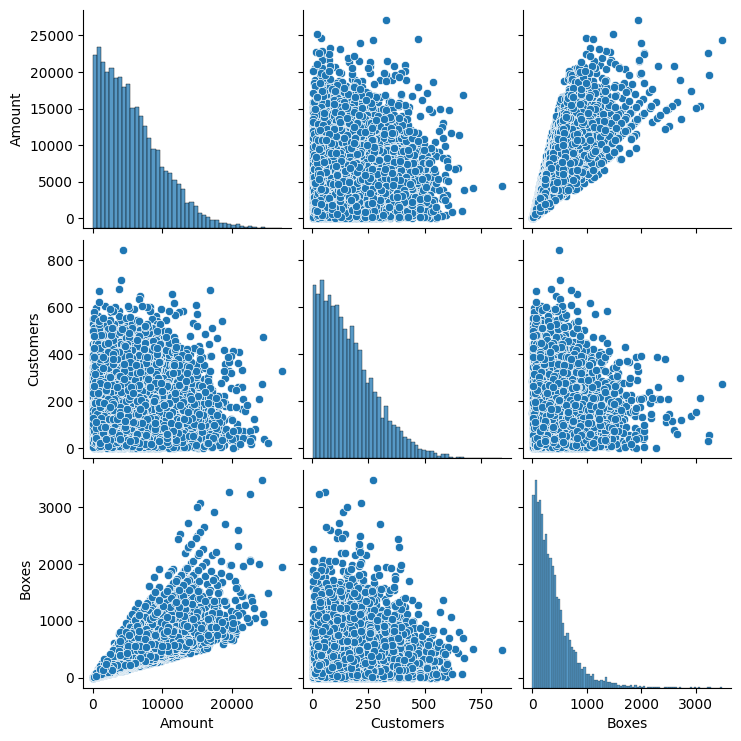

In [39]:
sns.pairplot(db[['SaleDate', 'Amount', 'Customers', 'Boxes']])
plt.show()

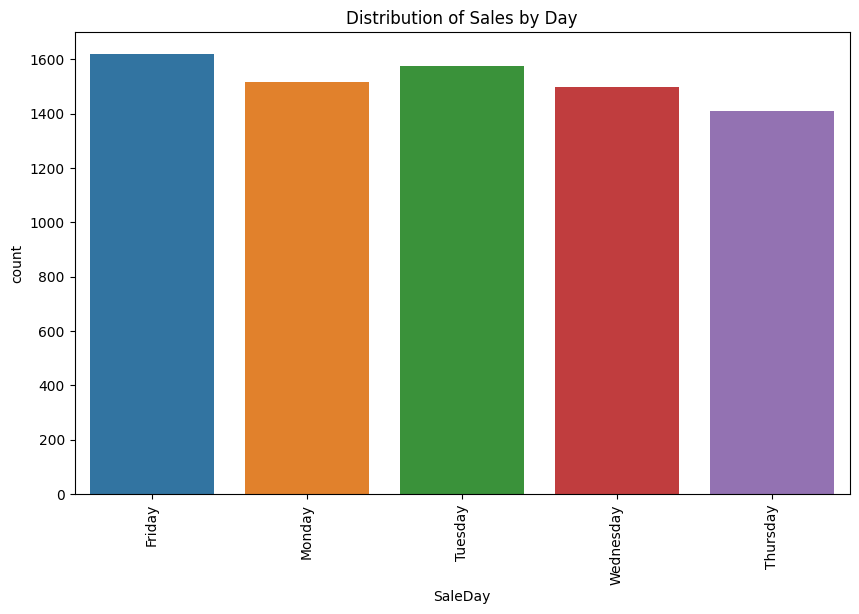

In [44]:
plt.figure(figsize=(10, 6))
sns.countplot(x='SaleDay', data=db)
plt.xticks(rotation=90)
plt.title('Distribution of Sales by Day')
plt.show()

In [45]:
corr=db[['SaleDate', 'Amount', 'Customers', 'Boxes']].corr()
corr

,SaleDate,Amount,Customers,Boxes
SaleDate,1.000000,0.013259,0.025498,0.077688
Amount,0.013259,1.000000,-0.007371,0.796317
Customers,0.025498,-0.007371,1.000000,-0.009629
Boxes,0.077688,0.796317,-0.009629,1.000000


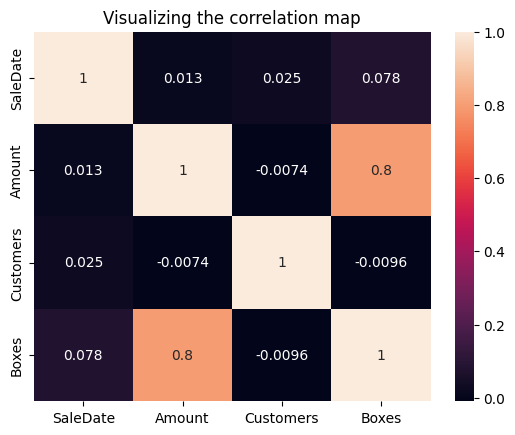

In [46]:
sns.heatmap(corr,annot=True)
plt.title("Visualizing the correlation map")
plt.show()

In [47]:
db.SPID.value_counts()

SPID
SP03    315
SP23    314
SP09    312
SP18    312
SP24    310
SP15    310
SP12    308
SP04    308
SP10    307
SP02    307
SP25    306
SP19    305
SP05    304
SP01    304
SP14    304
SP13    303
SP17    302
SP22    301
SP16    301
SP08    300
SP20    300
SP21    300
SP11    298
SP06    298
SP07    288
Name: count, dtype: int64